In [1]:
import numpy as np
from skimage import io
from os import listdir
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
# import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
#divide by 20 for electron-photon conversion
im_stack_plain = np.load('np_data/DD_F.npy')/20

avg_bg = np.load('fast_2x2_bg.npy')
avg_noise = np.load("fast_2x2_noise.npy")
# avg_bg = avg_bg.reshape(1,avg_bg.shape[0],avg_bg.shape[1])

isp_sum = np.sum(im_stack_plain,axis=(1,2))

im_stack_plain = im_stack_plain[isp_sum>100]

In [3]:
noise = np.stack([io.imread("bg/"+im) for im in listdir('bg/')],axis=0)

noise = noise[:,::2,::2] + noise[:,1::2,::2] + noise[:,::2,1::2] + noise[:,1::2,1::2]

In [4]:
print(im_stack_plain.shape)

(9815, 150, 150)


In [5]:
noise_i = np.random.randint(0,1000,len(im_stack_plain))
noise_x = np.random.randint(0,426,len(im_stack_plain))
noise_y = np.random.randint(0,426,len(im_stack_plain))


noise_train = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_2 = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - \
                          avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_3 = np.stack([(noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - \
                          avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150]) / \
                          avg_noise[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)


im_stack_plain_1 = im_stack_plain + noise_train
im_stack_plain_2 = im_stack_plain + noise_train_2
im_stack_plain_3 = im_stack_plain + noise_train_3

im_stack_plain_4 = im_stack_plain_2.copy()
im_stack_plain_4[im_stack_plain_4 < 0] = -np.sqrt(np.abs(im_stack_plain_4[im_stack_plain_4 < 0]))
im_stack_plain_4[im_stack_plain_4 > 0] = np.sqrt(im_stack_plain_4[im_stack_plain_4 > 0])

np.save('np_data/NR_noise.npy',im_stack_plain_1)
np.save('np_data/NR_noise_sub_bg.npy',im_stack_plain_2)
np.save('np_data/NR_noise_sqrt_sub_bg.npy',im_stack_plain_4)

del im_stack_plain_1, im_stack_plain_2, im_stack_plain_4


for i in np.arange(0,5.1,1):
    im_stack_plain_3[im_stack_plain_3 < i] = 0 
    np.save(f'np_data/NR_noise_{i}_threshold.npy',im_stack_plain_3)

In [6]:
del im_stack_plain, im_stack_plain_3, noise_train, noise_train_2, noise_train_3
im_stack = np.load('np_data/DD_F_Migdal.npy')/20
is_sum = np.sum(im_stack,axis=(1,2))
im_stack = im_stack[is_sum>100]

In [7]:
noise_i = np.random.randint(0,1000,len(im_stack))
noise_x = np.random.randint(0,426,len(im_stack))
noise_y = np.random.randint(0,426,len(im_stack))

noise_train = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_2 = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_3 = np.stack([(noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - \
                          avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150]) / \
                          avg_noise[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)


im_stack_1 = im_stack + noise_train
im_stack_2 = im_stack + noise_train_2
im_stack_3 = im_stack + noise_train_3

im_stack_4 = im_stack_2.copy()
im_stack_4[im_stack_4 < 0] = -np.sqrt(np.abs(im_stack_4[im_stack_4 < 0]))
im_stack_4[im_stack_4 > 0] = np.sqrt(im_stack_4[im_stack_4 > 0])


np.save('np_data/Migdal_noise.npy',im_stack_1)
np.save('np_data/Migdal_noise_sub_bg.npy',im_stack_2)
np.save('np_data/Migdal_noise_sqrt_sub_bg.npy',im_stack_4)

del im_stack_1, im_stack_2, im_stack_4

for i in np.arange(0,5.1,1):
    im_stack_3[im_stack_3 < i] = 0 
    np.save(f'np_data/Migdal_noise_{i}_threshold.npy',im_stack_3)
    

In [8]:
del im_stack, im_stack_3, noise_train, noise_train_2, noise_train_3
e_stack = np.load('np_data/Fe55.npy')/20

In [9]:
noise_i = np.random.randint(0,1000,len(e_stack))
noise_x = np.random.randint(0,426,len(e_stack))
noise_y = np.random.randint(0,426,len(e_stack))

noise_train = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_2 = np.stack([noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)

noise_train_3 = np.stack([(noise[noise_i[i], noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] - \
                          avg_bg[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150]) / \
                          avg_noise[noise_x[i]:noise_x[i]+150, noise_y[i]:noise_y[i]+150] for i in range(len(noise_i))],axis=0)


e_stack_1 = e_stack + noise_train
e_stack_2 = e_stack + noise_train_2
e_stack_3 = e_stack + noise_train_3

e_stack_4 = e_stack_2.copy()
e_stack_4[e_stack_4 < 0] = -np.sqrt(np.abs(e_stack_4[e_stack_4 < 0]))
e_stack_4[e_stack_4 > 0] = np.sqrt(e_stack_4[e_stack_4 > 0])

np.save('np_data/Electron_noise.npy',e_stack_1)
np.save('np_data/Electron_noise_sub_bg.npy',e_stack_2)
np.save('np_data/Electron_noise_sqrt_sub_bg.npy',e_stack_4)

del e_stack_1, e_stack_2, e_stack_4

for i in np.arange(0,5.1,1):
    e_stack_3[e_stack_3 < i] = 0 
    np.save(f'np_data/Electron_noise_{i}_threshold.npy',e_stack_3)
    

In [10]:
# test = np.load('np_data/Migdal_noise_sqrt_sub_bg.npy')
# plt.figure()
# plt.imshow(test[0,:,:],cmap='jet')

In [11]:
# test_2 = np.load('np_data/Migdal_noise_sub_bg.npy')
# plt.figure()
# plt.imshow(test_2[0,:,:],cmap='jet')

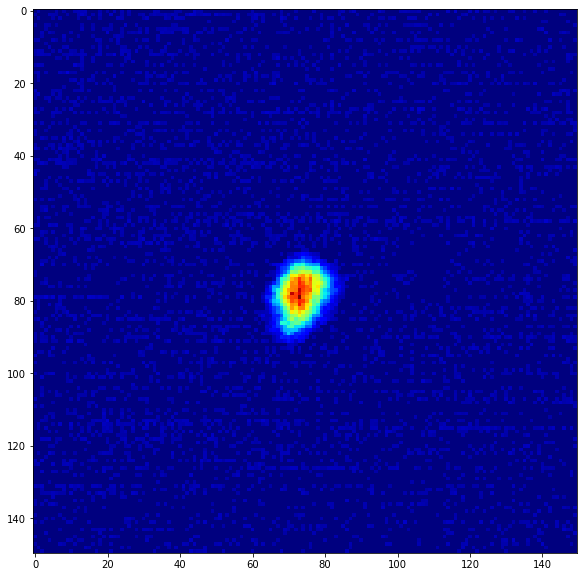

In [24]:
test_3 = np.load('np_data/Electron_noise_1.0_threshold.npy')
plt.figure(figsize=(12,10))
plt.imshow(test_3[100,:,:]**0.5,cmap='jet')